In [ ]:
from google.colab import files
files.upload()

Saving Advertising.csv to Advertising.csv


{'Advertising.csv': b',TV,radio,newspaper,sales\r\n1,230.1,37.8,69.2,22.1\r\n2,44.5,39.3,45.1,10.4\r\n3,17.2,45.9,69.3,9.3\r\n4,151.5,41.3,58.5,18.5\r\n5,180.8,10.8,58.4,12.9\r\n6,8.7,48.9,75,7.2\r\n7,57.5,32.8,23.5,11.8\r\n8,120.2,19.6,11.6,13.2\r\n9,8.6,2.1,1,4.8\r\n10,199.8,2.6,21.2,10.6\r\n11,66.1,5.8,24.2,8.6\r\n12,214.7,24,4,17.4\r\n13,23.8,35.1,65.9,9.2\r\n14,97.5,7.6,7.2,9.7\r\n15,204.1,32.9,46,19\r\n16,195.4,47.7,52.9,22.4\r\n17,67.8,36.6,114,12.5\r\n18,281.4,39.6,55.8,24.4\r\n19,69.2,20.5,18.3,11.3\r\n20,147.3,23.9,19.1,14.6\r\n21,218.4,27.7,53.4,18\r\n22,237.4,5.1,23.5,12.5\r\n23,13.2,15.9,49.6,5.6\r\n24,228.3,16.9,26.2,15.5\r\n25,62.3,12.6,18.3,9.7\r\n26,262.9,3.5,19.5,12\r\n27,142.9,29.3,12.6,15\r\n28,240.1,16.7,22.9,15.9\r\n29,248.8,27.1,22.9,18.9\r\n30,70.6,16,40.8,10.5\r\n31,292.9,28.3,43.2,21.4\r\n32,112.9,17.4,38.6,11.9\r\n33,97.2,1.5,30,9.6\r\n34,265.6,20,0.3,17.4\r\n35,95.7,1.4,7.4,9.5\r\n36,290.7,4.1,8.5,12.8\r\n37,266.9,43.8,5,25.4\r\n38,74.7,49.4,45.7,14.7\r\n39,

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

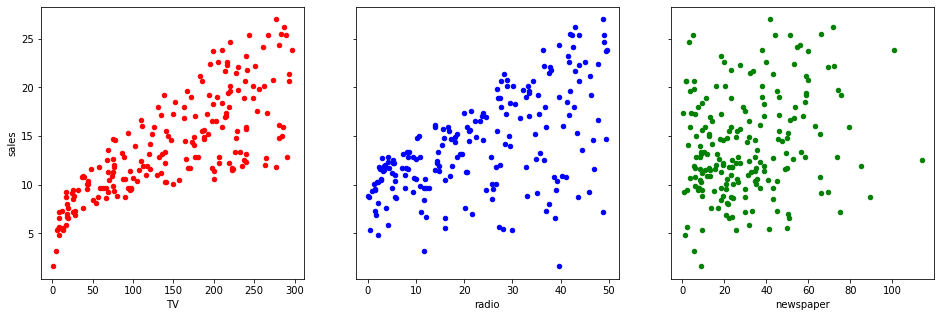

In [ ]:
fig, axs = plt.subplots( 1, 3, sharey = True)
df.plot(kind='scatter',x='TV',y='sales',ax = axs[0],color='red', figsize=(16,5))
df.plot(kind='scatter',x='radio',y='sales',color= 'blue',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales', color = 'green',ax=axs[2])

In [ ]:
feature_cols = ['TV']
X = df[feature_cols]
y = df['sales']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

print(lr.intercept_)
print(lr.coef_)


7.032593549127695
[0.04753664]


In [ ]:
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [ ]:
lr.predict(X_new)

array([9.40942557])

In [ ]:
X_new = pd.DataFrame({'TV':[df.TV.min(), df.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [ ]:
pred = lr.predict(X_new)
print(pred)

[ 7.0658692  21.12245377]


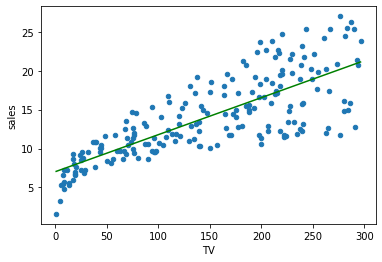

In [ ]:
df.plot(kind='scatter',x='TV',y='sales')
plt.plot(X_new, pred,color='green')

In [ ]:
import statsmodels.formula.api as smf
lr = smf.ols(formula='sales~TV',data = df).fit()
lr.conf_int()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [ ]:
lr.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [ ]:
lr.rsquared

0.611875050850071

In [ ]:
feature_cols = ['TV','radio','newspaper']
X = df[feature_cols]
y = df['sales']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

print(lr.intercept_)
print(lr.coef_)


2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [ ]:
import statsmodels.formula.api as sfa
lr = sfa.ols(formula='sales~TV+ radio+newspaper',data = df).fit()
lr.conf_int()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        06:40:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""